<a href="https://colab.research.google.com/github/vitahainis/earthquake-dashboard-Indonesia/blob/main/Projek_VITA_Data_Preparation_%26_Cleaning_(katalog_gempa_v2_tsv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library & Dataset

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [ ]:
# Load Data
df = pd.read_table('/content/katalog_gempa_v2.tsv')
print("Dataset berhasil dimuat!")

Dataset berhasil dimuat!


/tmp/ipython-input-1396854249.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table('/content/katalog_gempa_v2.tsv')


In [ ]:
# Menampilkan beberapa baris pertama
print(df.head(10).to_string())

       eventID                          datetime  latitude   longitude  magnitude mag_type  depth  phasecount  azimuth_gap                     location agency datetimeFM  latFM  lonFM  magFM magTypeFM  depthFM  phasecountFM  AzGapFM  scalarMoment  Mrr  Mtt  Mpp  Mrt  Mrp  Mtp  varianceReduction  doubleCouple  clvd  strikeNP1  dipNP1  rakeNP1  strikeNP2  dipNP2  rakeNP2  azgapFM  misfit
0  bmg2008vkye  2008-11-01 00:31:25.143741+00:00 -0.604440   98.895531   2.989742      MLv     20         6.0    146.70738  Southern Sumatra, Indonesia    NaN        NaN    NaN    NaN    NaN       NaN      NaN           NaN      NaN           NaN  NaN  NaN  NaN  NaN  NaN  NaN                NaN           NaN   NaN        NaN     NaN      NaN        NaN     NaN      NaN      NaN     NaN
1  bmg2008vlag  2008-11-01 01:34:29.660856+00:00 -6.611860  129.387220   5.507549       mb     30        62.0     45.46764                    Banda Sea    NaN        NaN    NaN    NaN    NaN       NaN      NaN           Na

# Profiling Data Awal

In [ ]:
# Profiling Data Awal
print("INFO DATASET:")
df.info()

INFO DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131833 entries, 0 to 131832
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   eventID            131833 non-null  object 
 1   datetime           131833 non-null  object 
 2   latitude           131833 non-null  float64
 3   longitude          131833 non-null  float64
 4   magnitude          131134 non-null  float64
 5   mag_type           131134 non-null  object 
 6   depth              131833 non-null  int64  
 7   phasecount         131831 non-null  float64
 8   azimuth_gap        131829 non-null  float64
 9   location           131817 non-null  object 
 10  agency             128390 non-null  object 
 11  datetimeFM         4607 non-null    object 
 12  latFM              4607 non-null    float64
 13  lonFM              4607 non-null    float64
 14  magFM              3908 non-null    float64
 15  magTypeFM          3908 non-null    o

In [ ]:
# Ukuran Dataset
ukuran_data = df.shape
print("Ukuran Data:")
print("Jumlah Baris:", ukuran_data[0])
print("Jumlah Kolom:", ukuran_data[1])

Ukuran Data:
Jumlah Baris: 131833
Jumlah Kolom: 37


# Data Check & Cleaning

In [ ]:
# Cek Missing Values
missing_data = df.isnull().sum()
print("JUMLAH MISSING VALUES PER KOLOM:")
print(missing_data[missing_data >= 0])

JUMLAH MISSING VALUES PER KOLOM:
eventID                   0
datetime                  0
latitude                  0
longitude                 0
magnitude               699
mag_type                699
depth                     0
phasecount                2
azimuth_gap               4
location                 16
agency                 3443
datetimeFM           127226
latFM                127226
lonFM                127226
magFM                127925
magTypeFM            127925
depthFM              127226
phasecountFM         127226
AzGapFM              127381
scalarMoment         127381
Mrr                  127381
Mtt                  127381
Mpp                  127381
Mrt                  127381
Mrp                  127381
Mtp                  127381
varianceReduction    127384
doubleCouple         127381
clvd                 127381
strikeNP1            127226
dipNP1               127226
rakeNP1              127226
strikeNP2            127226
dipNP2               127226
rakeNP2        

In [ ]:
# Mempertahankan variabel yang diperlukan dan menghapus beberapa variabel yang tidak diperlukan karena terdapat banyak missing value
keep_cols = ['datetime', 'latitude', 'longitude', 'magnitude', 'depth', 'location']
df = df[keep_cols]

In [ ]:
# Menampilkan nilai magnitude yang hilang
df[df['magnitude'].isna()]

,datetime,latitude,longitude,magnitude,depth,location
11959,2011-06-26 12:16:38.051947+00:00,-2.333816,136.660860,NaN,10,"Irian Jaya Region, Indonesia"
11985,2011-06-27 16:47:15.707140+00:00,-9.284966,122.462210,NaN,139,Savu Sea
12042,2011-07-04 05:17:37.048492+00:00,4.370785,97.515411,NaN,10,"Northern Sumatra, Indonesia"
12055,2011-07-05 19:09:11.444307+00:00,1.448878,96.951912,NaN,13,Off West Coast of Northern Sumatra
12149,2011-07-19 03:18:38.252300+00:00,-1.274952,137.825010,NaN,10,Near North Coast of Irian Jaya
...,...,...,...,...,...,...
130788,2025-09-13 16:08:27.926822+00:00,5.216456,123.283287,NaN,563,"Mindanao, Philippines"
130819,2025-09-14 14:49:42.461860+00:00,-2.850826,100.965187,NaN,20,"Southern Sumatra, Indonesia"
131033,2025-09-18 18:19:50.816554+00:00,-3.467183,135.494751,NaN,32,"West Papua Region, Indonesia"
131322,2025-09-22 18:31:53.677819+00:00,-6.056426,130.836639,NaN,142,Banda Sea


In [ ]:
# Mengisi nilai magnitude yang hilang berdasarkna median per location
# Step 1: isi berdasarkan median per lokasi
df['magnitude'] = df.groupby('location')['magnitude']\
                    .transform(lambda x: x.fillna(x.median()))

# Step 2: jika masih ada NA, isi dengan median keseluruhan
df['magnitude'] = df['magnitude'].fillna(df['magnitude'].median())

In [ ]:
# Menampilkan nilai location yang hilang
df[df['location'].isna()]

,datetime,latitude,longitude,magnitude,depth,location
48283,2018-01-29 01:48:03.419591+00:00,-5.597167,131.062653,3.452926,67,NaN
48441,2018-02-04 19:55:05.594914+00:00,-9.087294,122.490440,3.452926,130,NaN
52305,2018-07-28 22:47:38.491913+00:00,-8.346738,116.503258,3.452926,10,NaN
103761,2023-05-10 12:37:50.902814+00:00,-6.470338,104.899498,3.452926,10,NaN
103872,2023-05-15 12:07:48.386638+00:00,2.286858,128.382523,3.452926,210,NaN
104090,2023-05-25 12:29:06.648422+00:00,-7.816572,123.220772,3.452926,11,NaN
106546,2023-08-28 02:06:23.175708+00:00,-3.785883,140.254044,3.452926,10,NaN
108521,2023-11-06 13:08:08.518658+00:00,-1.383827,126.358292,3.452926,12,NaN
108935,2023-11-15 17:29:02.280576+00:00,1.927599,127.283226,3.452926,89,NaN
109456,2023-11-29 16:19:44.205363+00:00,-8.818794,110.347984,3.452926,18,NaN


In [ ]:
# Mengisi nilai location berdasarkan latitude & longitude (reverse geocoding)
# !pip install geopy
# Membuat fungsi reverse geocode
geolocator = Nominatim(user_agent="location_filler")
reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1)

# Mengisi location yang hilang
def get_location(lat, lon):
    try:
        loc = reverse((lat, lon), language="en")
        if loc is not None:
            return loc.address
        else:
            return None
    except:
        return None

# Hanya untuk baris yang missing
mask = df['location'].isna()

df.loc[mask, 'location'] = df[mask].apply(lambda row: get_location(row['latitude'], row['longitude']),axis=1)

In [ ]:
# Cek lagi missing value untuk variabel magnitude dan location
df[['magnitude', 'location']].isna().sum()

,0
magnitude,0
location,2


In [ ]:
df[df['location'].isna()]

,datetime,latitude,longitude,magnitude,depth,location
109456,2023-11-29 16:19:44.205363+00:00,-8.818794,110.347984,3.452926,18,None
117723,2024-12-22 19:04:26.620115+00:00,-10.757921,112.483307,3.452926,10,None


In [ ]:
# Masih terdapat nilai location yang hilang, sehingga:
# Find the missing location based on the latitude and longitude values
display(df[(df['latitude']>-8.82) & (df['latitude']<-8.80) & (df['longitude']>110.33) & (df['longitude']<110.44)])

display(df[(df['latitude']>-10.80) & (df['latitude']<-10.65) & (df['longitude']>112.45) & (df['longitude']<112.60)])

,datetime,latitude,longitude,magnitude,depth,location
21983,2013-03-19 23:40:29.750420+00:00,-8.807536,110.420754,2.585912,18,"Java, Indonesia"
44625,2017-08-14 10:44:29.827643+00:00,-8.803667,110.438194,3.299659,29,"Java, Indonesia"
78502,2021-02-06 04:50:41.931716+00:00,-8.800367,110.339264,3.065167,32,"Java, Indonesia"
109456,2023-11-29 16:19:44.205363+00:00,-8.818794,110.347984,3.452926,18,None
121364,2025-03-19 23:11:39.557551+00:00,-8.805302,110.376022,2.551810,9,"Java, Indonesia"


,datetime,latitude,longitude,magnitude,depth,location
69148,2020-02-11 19:27:45.740431+00:00,-10.699932,112.577301,4.418186,10,"South of Java, Indonesia"
117723,2024-12-22 19:04:26.620115+00:00,-10.757921,112.483307,3.452926,10,None


In [ ]:
# location berdasarkan nilai latitude & longitude tersebut berada di:
df.loc[109456, 'location'] = 'Java, Indonesia'
df.loc[117723, 'location'] = 'South of Java, Indonesia'
df.loc[[109456, 117723]]

,datetime,latitude,longitude,magnitude,depth,location
109456,2023-11-29 16:19:44.205363+00:00,-8.818794,110.347984,3.452926,18,"Java, Indonesia"
117723,2024-12-22 19:04:26.620115+00:00,-10.757921,112.483307,3.452926,10,"South of Java, Indonesia"


In [ ]:
# Cek lagi missing value untuk semua variabel
df.isnull().sum()

,0
datetime,0
latitude,0
longitude,0
magnitude,0
depth,0
location,0


In [ ]:
# Checking Duplicate
df.duplicated().sum()

np.int64(0)

# Restructure Data

**UBAH TIPE DATA**

In [ ]:
# Ubah data type datetime
df['datetime'] = pd.to_datetime(df['datetime'], format='ISO8601')

**TAMBAH VARIABEL BARU**

In [ ]:
# Tambah beberapa variabel baru
df['Date'] = pd.to_datetime(df['datetime'].dt.date)
df['Year'] = df['datetime'].dt.strftime('%Y')
df['Month'] = df['datetime'].dt.month_name()
df['Day'] = df['datetime'].dt.day_name()
df['Time'] = df['datetime'].dt.round(freq='S').dt.time.astype(str)

/tmp/ipython-input-2020856051.py:6: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['Time'] = df['datetime'].dt.round(freq='S').dt.time.astype(str)


In [ ]:
# Tambah Variabel Depth Category
def kategori_kedalaman(d):
    if d < 70:
        return "Shallow"
    elif 70 <= d <= 300:
        return "Intermediate"
    else:
        return "Deep"

# Membuat kolom baru pada dataframe
df["Depth Category"] = df["depth"].apply(kategori_kedalaman)

In [ ]:
# Tambah Variabel Magnitudo Type
def kategori_magnitudo(m):
    if m < 2.0:
        return "Micro"
    elif 2.0 <= m < 4.0:
        return "Minor"
    elif 4.0 <= m < 5.0:
        return "Light"
    elif 5.0 <= m < 6.0:
        return "Moderate"
    elif 6.0 <= m < 7.0:
        return "Strong"
    elif 7.0 <= m < 8.0:
        return "Major"
    else:
        return "Great"

# Tambahkan kolom baru pada dataframe
df['Magnitude Type'] = df['magnitude'].apply(kategori_magnitudo)

**RENAME KOLOM**

In [ ]:
# Ubah posisi kolom pada dataframe
new_cols = ['location', 'magnitude', 'Magnitude Type', 'depth', 'Depth Category', 'latitude', 'longitude', 'datetime', 'Date', 'Year', 'Month', 'Day', 'Time']
df = df[new_cols]
df = df.reindex(columns = new_cols)

In [ ]:
# Rename kolom
df.rename(columns = {'location': 'Location', 'magnitude': 'Magnitude', 'depth': 'Depth (km)',  'latitude': 'Latitude', 'longitude': 'Longitude', 'datetime': 'Datetime'}, inplace = True)

In [ ]:
# Filter the 10 years data from 2016-01-01 to 2025-10-01
df_filter = df[(df['Date']>='2016-01-01') & (df['Date']<'2025-10-01')]
df_filter.head()

,Location,Magnitude,Magnitude Type,Depth (km),Depth Category,Latitude,Longitude,Datetime,Date,Year,Month,Day,Time
34848,"Sulawesi, Indonesia",2.107841,Minor,23,Shallow,-4.673604,120.208885,2016-01-01 08:12:32.904705+00:00,2016-01-01,2016,January,Friday,08:12:33
34849,Savu Sea,2.817404,Minor,28,Shallow,-9.262277,122.524605,2016-01-01 08:16:56.557720+00:00,2016-01-01,2016,January,Friday,08:16:57
34850,"Minahassa Peninsula, Sulawesi",2.970977,Minor,10,Shallow,-0.713732,122.217033,2016-01-01 09:53:56.660626+00:00,2016-01-01,2016,January,Friday,09:53:57
34851,"Minahassa Peninsula, Sulawesi",3.929383,Minor,55,Shallow,0.706641,122.419487,2016-01-01 10:50:46.366833+00:00,2016-01-01,2016,January,Friday,10:50:46
34852,"Sulawesi, Indonesia",3.633051,Minor,10,Shallow,-1.503348,120.092293,2016-01-01 12:00:14.536437+00:00,2016-01-01,2016,January,Friday,12:00:15


# Checkpoint Lagi

In [ ]:
# Checking Missing values
df_filter.isnull().sum()

,0
Location,0
Magnitude,0
Magnitude Type,0
Depth (km),0
Depth Category,0
Latitude,0
Longitude,0
Datetime,0
Date,0
Year,0


In [ ]:
# Checking Duplicate
df_filter.duplicated().sum()

np.int64(0)

In [ ]:
# Checking Unique Coloumn
df_filter.nunique()

,0
Location,62
Magnitude,96337
Magnitude Type,6
Depth (km),676
Depth Category,3
Latitude,96860
Longitude,95753
Datetime,96959
Date,3510
Year,10


**CEK OUTLIER**

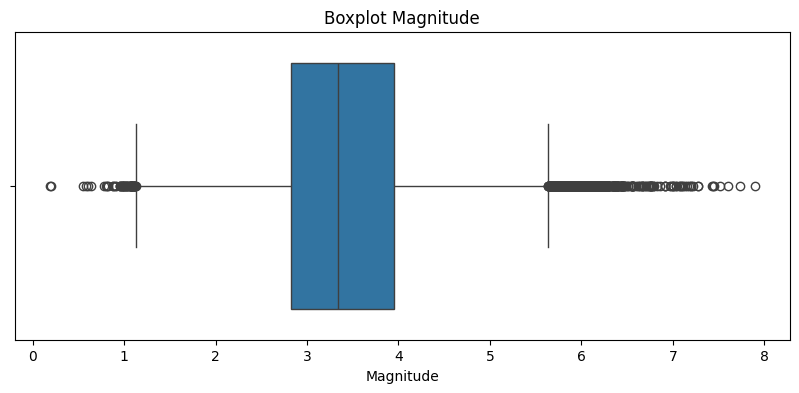

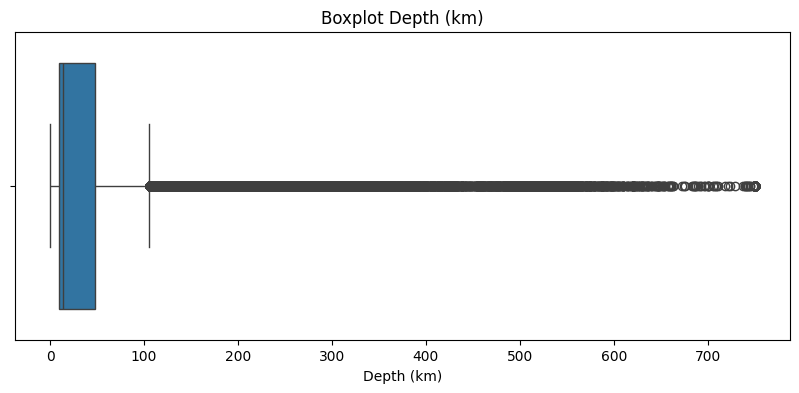

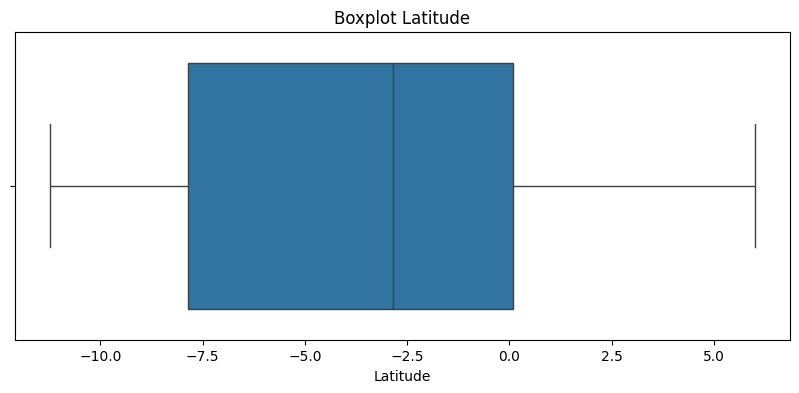

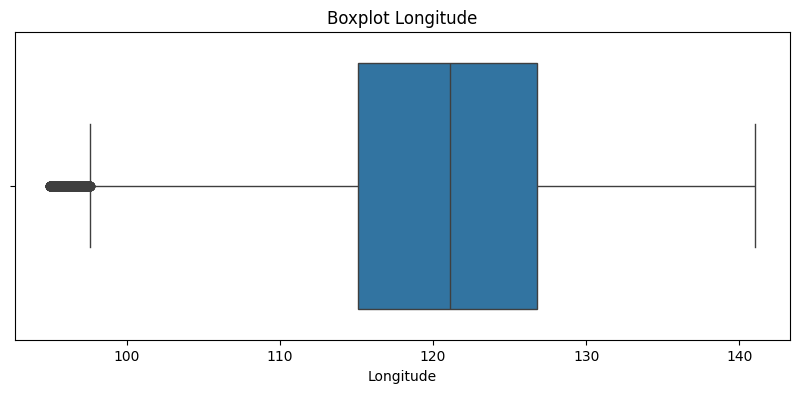

In [ ]:
# Cek Outlier
# pilih hanya kolom numerik
numeric_cols = df_filter.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df_filter[col])
    plt.title(f"Boxplot {col}")
    plt.show()

In [ ]:
# # Menampilkan jumlah data sebelum dan sesudah difilter 10 tahun
print("Sebelum:", len(df))
print("Sesudah:", len(df_filter))
print("Terhapus:", len(df) - len(df_filter))

Sebelum: 131833
Sesudah: 96959
Terhapus: 34874


In [ ]:
df_filter

,Location,Magnitude,Magnitude Type,Depth (km),Depth Category,Latitude,Longitude,Datetime,Date,Year,Month,Day,Time
34848,"Sulawesi, Indonesia",2.107841,Minor,23,Shallow,-4.673604,120.208885,2016-01-01 08:12:32.904705+00:00,2016-01-01,2016,January,Friday,08:12:33
34849,Savu Sea,2.817404,Minor,28,Shallow,-9.262277,122.524605,2016-01-01 08:16:56.557720+00:00,2016-01-01,2016,January,Friday,08:16:57
34850,"Minahassa Peninsula, Sulawesi",2.970977,Minor,10,Shallow,-0.713732,122.217033,2016-01-01 09:53:56.660626+00:00,2016-01-01,2016,January,Friday,09:53:57
34851,"Minahassa Peninsula, Sulawesi",3.929383,Minor,55,Shallow,0.706641,122.419487,2016-01-01 10:50:46.366833+00:00,2016-01-01,2016,January,Friday,10:50:46
34852,"Sulawesi, Indonesia",3.633051,Minor,10,Shallow,-1.503348,120.092293,2016-01-01 12:00:14.536437+00:00,2016-01-01,2016,January,Friday,12:00:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131802,"Sumbawa Region, Indonesia",2.311588,Minor,10,Shallow,-8.541434,116.058250,2025-09-30 22:03:40.970540+00:00,2025-09-30,2025,September,Tuesday,22:03:41
131803,Timor Region,2.599899,Minor,53,Shallow,-9.264260,123.995430,2025-09-30 22:22:40.567392+00:00,2025-09-30,2025,September,Tuesday,22:22:41
131804,Banda Sea,3.978619,Minor,103,Intermediate,-5.353411,131.120804,2025-09-30 22:58:41.484307+00:00,2025-09-30,2025,September,Tuesday,22:58:41
131805,Bali Sea,2.871827,Minor,11,Shallow,-7.280288,114.172348,2025-09-30 23:26:07.209824+00:00,2025-09-30,2025,September,Tuesday,23:26:07


# Profiling Data Akhir

In [ ]:
# Profiling Data Akhir
print("INFO DATASET:")
df_filter.info()

# Statistik numerik
print("\n=== STATISTIK VARIABEL NUMERIK ===")
display(df_filter.describe())

# Statistik kategorik
print("\n=== STATISTIK VARIABEL KATEGORIK ===")
display(df_filter.describe(include=['object', 'category']))


INFO DATASET:
<class 'pandas.core.frame.DataFrame'>
Index: 96959 entries, 34848 to 131806
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Location        96959 non-null  object             
 1   Magnitude       96959 non-null  float64            
 2   Magnitude Type  96959 non-null  object             
 3   Depth (km)      96959 non-null  int64              
 4   Depth Category  96959 non-null  object             
 5   Latitude        96959 non-null  float64            
 6   Longitude       96959 non-null  float64            
 7   Datetime        96959 non-null  datetime64[ns, UTC]
 8   Date            96959 non-null  datetime64[ns]     
 9   Year            96959 non-null  object             
 10  Month           96959 non-null  object             
 11  Day             96959 non-null  object             
 12  Time            96959 non-null  object             
dtypes: datetime64[ns,

,Magnitude,Depth (km),Latitude,Longitude,Date
count,96959.000000,96959.000000,96959.000000,96959.000000,96959
mean,3.407694,47.446972,-3.382695,119.502570,2021-06-03 14:13:08.250703872
min,0.191153,0.000000,-11.231423,95.006195,2016-01-01 00:00:00
25%,2.820664,10.000000,-7.847521,115.101612,2019-03-09 00:00:00
50%,3.338639,14.000000,-2.847670,121.093658,2021-07-04 00:00:00
75%,3.946981,48.000000,0.081780,126.781410,2023-10-03 00:00:00
max,7.894698,750.000000,5.998937,140.998291,2025-09-30 00:00:00
std,0.819866,78.499044,4.312301,10.518135,NaN



=== STATISTIK VARIABEL KATEGORIK ===


,Location,Magnitude Type,Depth Category,Year,Month,Day,Time
count,96959,96959,96959,96959,96959,96959,96959
unique,62,6,3,10,12,7,57941
top,"Sulawesi, Indonesia",Minor,Shallow,2025,April,Friday,21:52:54
freq,10264,71854,77512,13944,9081,14592,10


In [ ]:
# Simpan Data yang Sudah Dibersihkan
df_filter.to_csv('katalog gempa_v2 clean .csv', index=False)
print("Dataset bersih disimpan sebagai 'katalog gempa_v2 clean.csv'")

Dataset bersih disimpan sebagai 'katalog gempa_v2 clean.csv'
